# Figures for chapter 2 of my PhD thesis

In [1]:
import os
import sys
import numpy as np
import scipy.stats as stats
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import datetime
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
mpl.rc_file('../rc_file')
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append("..")
from tqdm import notebook
from paths import path_results, path_prace, CESM_filename
from filters import lowpass
from xr_regression import xr_linear_trend, xr_lintrend
from constants import R_earth
A_Earth = 4*np.pi*R_earth**2

The file "/projects/0/prace_imau/prace_2013081679/cesm1_0_4/f09_g16/spinup_pd_maxcores_f09_g16/run/spinup_pd_maxcores_f09_g16.cam2.h0.0001-01.nc" does not exist


## Hallberg map
map showing the ratio of grid spacing vs. Rossby deformation radius

maybe combine with SSH variability

## overview of simulations
GMST time series of HIGH: ctrl, rcp, hq, LOW: lpd, lc1, lq

In [4]:
# made in GMST.ipynb
gmst_ctrl = xr.open_dataarray(f'{path_results}/GMST/GMST_monthly_ctrl.nc', decode_times=False)
gmst_rcp  = xr.open_dataarray(f'{path_results}/GMST/GMST_monthly_rcp.nc' , decode_times=False)
gmst_hq   = xr.open_dataarray(f'{path_results}/GMST/GMST_monthly_hq.nc'  , decode_times=False)
gmst_lpd  = xr.open_dataarray(f'{path_results}/GMST/GMST_monthly_lpd.nc' , decode_times=False)
gmst_lc1  = xr.open_dataarray(f'{path_results}/GMST/GMST_monthly_lc1.nc' , decode_times=False)
gmst_lpi  = xr.open_dataarray(f'{path_results}/GMST/GMST_monthly_lpi.nc' , decode_times=False)
gmst_lr1  = xr.open_dataarray(f'{path_results}/GMST/GMST_monthly_lr1.nc' , decode_times=False)
gmst_ld   = xr.open_dataarray(f'{path_results}/GMST/GMST_monthly_ld.nc'  , decode_times=False)
gmst_lq   = xr.open_dataarray(f'{path_results}/GMST/GMST_monthly_lq.nc'  , decode_times=False)

gmst_lpd_  = xr.open_dataset(f'{path_prace}/GMST/GMST_yrly_lpd.nc' , decode_times=False).GMST

In [5]:
GMST_h200  = gmst_ctrl.sel(time=slice(200*365,230*365)).mean()
GMST_l500  = gmst_lpd.isel(time=slice(0,30*12)).mean()
GMST_l1200 = gmst_lpd.isel(time=slice(690*12,720*12)).mean()

In [6]:
# CMIP5 CESM1-CAM5contributions
header = ['year']+[calendar.month_abbr[m] for m in range(1,13)]
kw = dict(skiprows=5, names=header, delim_whitespace=True, index_col=0)
rcp85 = pd.read_csv('../../data/CMIP5/global_tas_Amon_CESM1-CAM5_rcp85_ave.dat', **kw).mean(axis=1)
rcp60 = pd.read_csv('../../data/CMIP5/global_tas_Amon_CESM1-CAM5_rcp60_ave.dat', **kw).mean(axis=1)

co2x4 = xr.open_dataarray('../../data/CMIP5/tas_CESM104_abrupt4x_5900.nc')
cmipc = xr.open_dataarray('../../data/CMIP5/tas_CESM104_control_1000.nc')
rcp85 -= rcp85[2000]
rcp60 -= rcp60[2000]
co2x4 -= cmipc.mean()

/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarnin

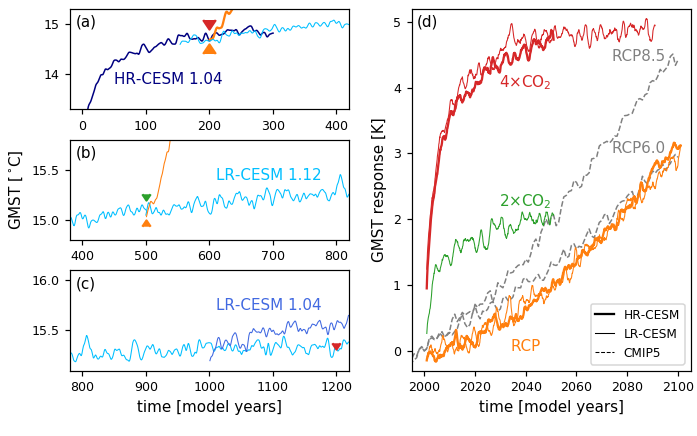

In [7]:
f = plt.figure(figsize=(6.4,4))
ax1 = f.add_axes([.1,.75,.4,.23])
ax2 = f.add_axes([.1,.45,.4,.23])
ax3 = f.add_axes([.1,.15,.4,.23])
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.plot(gmst_ctrl.time[11:]/365     , lowpass(gmst_ctrl.rolling(time=12).mean().dropna('time')-273.15,60), lw=1 , c='navy', label='CTRL' )
    ax.plot(gmst_hq  .time[11:]/365+200 , lowpass(gmst_hq  .rolling(time=12).mean().dropna('time')-273.15,60), label='4xCO2', c='C3')
    ax.plot(gmst_rcp .time[11:]/365+200 , lowpass(gmst_rcp .rolling(time=12).mean().dropna('time')-273.15,60), label='RCP'  , c='C1')
    ax.plot(gmst_lpd_.time/365     , lowpass(gmst_lpd_                                                   , 5), lw=.7, c='deepskyblue', label='CTRL 1.1.2')
    ax.plot(gmst_lpd .time[11:]/365     , lowpass(gmst_lpd .rolling(time=12).mean().dropna('time')-273.15,60), lw=.7, c='deepskyblue', label='CTRL 1.1.2')
    ax.plot(gmst_lc1 .time[11:]/365+1000, lowpass(gmst_lc1 .rolling(time=12).mean().dropna('time')-273.15,60), lw=.7, c='royalblue', label='CTRL 1.0.4')
    ax.plot(gmst_lr1 .time[11:]/365+ 500, lowpass(gmst_lr1 .rolling(time=12).mean().dropna('time')-273.15,60), lw=.7, label='RCP'  , c='C1')
    ax.plot(gmst_lq  .time[11:]/365+1200, lowpass(gmst_lq  .rolling(time=12).mean().dropna('time')-273.15,60), lw=.7, label='4xCO2', c='C3')
    ax.plot(gmst_ld  .time[11:]/365+ 500, lowpass(gmst_ld  .rolling(time=12).mean().dropna('time')-273.15,60), lw=.7, label='2xCO2', c='C2')
    ax.set_xlim((-20+i*400,(i+1)*400+20))
    ax.set_ylim([(13.3,15.3),(14.8,15.8),(15.1,16.1)][i])

ax1.scatter(200 , GMST_h200 -273.15+.1, s=70, c='C3', zorder=4, marker=7)
ax1.scatter(200 , GMST_h200 -273.15-.2, s=70, c='C1', zorder=4, marker=6)
ax2.scatter(500 , GMST_l500 -273.15-.1, s=30, c='C1', zorder=4, marker=6, facecolor='none')
ax2.scatter(500 , GMST_l500 -273.15+.1, s=30, c='C2', zorder=4, marker=7, facecolor='none')
ax3.scatter(1200, GMST_l1200-273.15   , s=30, c='C3', zorder=4, marker=7, facecolor='none')

ax1.text(  50,13.8, 'HR-CESM 1.04', c='navy')
ax2.text( 610,15.4, 'LR-CESM 1.12', c='deepskyblue')
ax3.text(1010,15.7, 'LR-CESM 1.04', c='royalblue')

for i, ax in enumerate([ax1,ax2,ax3]):
    ax.text(0.02,.82, '('+['a','b','c'][i]+')', transform=ax.transAxes)
ax3.set_xlabel('time [model years]')
ax2.set_ylabel(r'GMST [$^\circ\!$C]')

# forced scenarios
ax = f.add_axes([.59,.15,.4,.83])

header = ['year']+[calendar.month_abbr[m] for m in range(1,13)]
kw = dict(skiprows=5, names=header, delim_whitespace=True, index_col=0)
df0 = pd.read_csv('../../data/CMIP5/global_tas_Amon_CESM1-CAM5_rcp85_ave.dat', **kw)
df = df0.mean(axis=1)
ax.plot(rcp85.index    , rcp85, c='grey', ls='--', lw=1)
ax.plot(rcp60.index    , rcp60, c='grey', ls='--', lw=1)

ax.plot(gmst_rcp .time/365+2000, gmst_rcp .rolling(time=12).mean()-GMST_h200, label='RCP'  , c='C1')
# ax.plot(gmst_rcp .time/365+2000, xr_lintrend(gmst_rcp-GMST_h200), ls='--', c='C1')
ax.plot(gmst_hq  .time/365+2000, gmst_hq  .rolling(time=12).mean()-GMST_h200, label='4xCO2', c='C3')
ax.plot(gmst_lr1 .time/365+2000, gmst_lr1 .rolling(time=12).mean()-GMST_l500, lw=.7, label='RCP'  , c='C1')
# ax.plot(gmst_lr1 .time/365+2000, xr_lintrend(gmst_lr1-GMST_l500)            , lw=.7, ls='--', c='C1')
ax.plot(gmst_lq  .time/365+2000, gmst_lq  .rolling(time=12).mean()-GMST_l1200, lw=.7, label='4xCO2', c='C3')
ax.plot(gmst_ld  .time/365+2000, gmst_ld  .rolling(time=12).mean()-GMST_l1200, lw=.7, label='2xCO2', c='C2')
ax.text(2040,   4, r'4$\times$CO$_2$', c='C3'  , ha='center')
ax.text(2040, 2.2, r'2$\times$CO$_2$', c='C2'  , ha='center')
ax.text(2040,   0, 'RCP'             , c='C1'  , ha='center')
ax.text(2095, 4.4, 'RCP8.5'          , c='grey', ha='right')
ax.text(2095, 3.0, 'RCP6.0'          , c='grey', ha='right')
lh, = ax.plot([],[],c='k',                 label='HR-CESM')
ll, = ax.plot([],[],c='k', lw=.7,          label='LR-CESM')
lc, = ax.plot([],[],c='k', lw=.7, ls='--', label='CMIP5')
ax.legend(handles=[lh,ll,lc], loc='lower right', handlelength=1.5, fontsize=8)
ax.set_xlim((1995,2105))
ax.set_ylim((-.3,5.2))
ax.text(0.02,.95,'(d)', transform=ax.transAxes)
ax.set_xlabel('time [model years]')
ax.set_ylabel(r'GMST response [K]')
plt.savefig(f'{path_results}/thesis/2_sim_overview.eps')
plt.savefig(f'{path_results}/ECS/simulations_overview')


### RCP vs RCP8.5

In [22]:
header = ['year']+[calendar.month_abbr[m] for m in range(1,13)]
kw = dict(skiprows=5, names=header, delim_whitespace=True, index_col=0)
df0 = pd.read_csv('../../data/CMIP5/global_tas_Amon_CESM1-CAM5_rcp85_ave.dat', **kw)
df1 = pd.read_csv('../../data/CMIP5/global_tas_Amon_CESM1-CAM5_rcp85_r1i1p1.dat', **kw)
df2 = pd.read_csv('../../data/CMIP5/global_tas_Amon_CESM1-CAM5_rcp85_r2i1p1.dat', **kw)

['year',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

2.9253170027715782
4.413461666666637
4.43268833333334
4.394236666666688


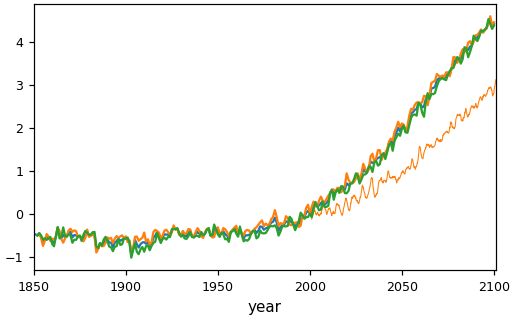

In [9]:
plt.plot(gmst_lr1 .time/365+2000, gmst_lr1 .rolling(time=12).mean()-GMST_l500, lw=.7, label='RCP'  , c='C1')
print((gmst_lr1[-12*5:].mean()-GMST_l500).values)
for df in [df0, df1, df2]:
    df = df.mean(axis=1)
    df = df-df[2000]
    df.plot()
    print(df[-5:].mean())